<a href="https://colab.research.google.com/github/mirunanedelcu25-cyber/CourtDynamics313421/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
conn= sqlite3.connect("basketball.db")
tables= pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                            name
0                        players
1          player_regular_season
2   player_regular_season_career
3                player_playoffs
4         player_playoffs_career
5                 player_allstar
6                          teams
7                    team_season
8                          draft
9                 coaches_season
10                coaches_career
11               data_dictionary


We wanted to see all the tables and decide which one to use for our analysis.

In [ ]:
conn= sqlite3.connect("basketball.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]
print(tables)
for table in tables:
  print(f"\n{table}")
  cursor.execute(f"PRAGMA table_info({table});")
  cols= [col[1] for col in cursor.fetchall()]
  print(cols)

['players', 'player_regular_season', 'player_regular_season_career', 'player_playoffs', 'player_playoffs_career', 'player_allstar', 'teams', 'team_season', 'draft', 'coaches_season', 'coaches_career', 'data_dictionary']

players
['ilkid', 'firstname', 'lastname', 'position', 'firstseason', 'lastseason', 'h_feet', 'h_inches', 'weight', 'college', 'birthdate']

player_regular_season
['ilkid', 'year', 'firstname', 'lastname', 'team', 'leag', 'gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 'stl', 'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm']

player_regular_season_career
['ilkid', 'firstname', 'lastname', 'leag', 'gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 'stl', 'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm']

player_playoffs
['ilkid', 'year', 'firstname', 'lastname', 'team', 'leag', 'gp', 'minutes', 'pts', 'dreb', 'oreb', 'reb', 'asts', 'stl', 'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm']

player_playoffs_care

we analyzed all the columns and draw the conclusion to choose the table player_regular_season for our analysis

In [ ]:
players= pd.read_sql("SELECT * FROM player_regular_season", conn)
players.head()


,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,oreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,RATKOGE01,1952,George,Ratkovicz,MI1,N,71.0,NaN,678.0,0.0,...,0.0,0.0,NaN,287.0,619.0,208.0,373.0,262.0,0.0,0.0
1,MOHAMNA01,1999,Nazr,Mohammed,PHI,N,NaN,NaN,54.0,16.0,...,4.0,12.0,18.0,29.0,54.0,21.0,22.0,12.0,NaN,0.0
2,CLARKKE01,1998,Keon,Clark,DEN,N,28.0,409.0,93.0,36.0,...,10.0,31.0,21.0,52.0,80.0,36.0,NaN,21.0,1.0,0.0
3,BLAYLMO01,2000,Mookie,Blaylock,GSW,N,69.0,2352.0,760.0,71.0,...,NaN,20.0,128.0,134.0,801.0,317.0,76.0,53.0,225.0,73.0
4,PERSOWE01,1997,Wesley,Person,CLE,N,82.0,3198.0,1204.0,65.0,...,129.0,NaN,110.0,108.0,957.0,440.0,170.0,132.0,447.0,192.0


a little look into the data to understand the names of the columns better;

In [ ]:
print(players.columns)

Index(['ilkid', 'year', 'firstname', 'lastname', 'team', 'leag', 'gp',
       'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 'stl', 'blk',
       'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm'],
      dtype='object')


we wanted to see with which features we should work with;

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19157 entries, 0 to 19156
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ilkid      19157 non-null  object 
 1   year       19157 non-null  int64  
 2   firstname  19157 non-null  object 
 3   lastname   19157 non-null  object 
 4   team       19157 non-null  object 
 5   leag       19157 non-null  object 
 6   gp         17242 non-null  float64
 7   minutes    17242 non-null  float64
 8   pts        17242 non-null  float64
 9   oreb       17242 non-null  float64
 10  dreb       17242 non-null  float64
 11  reb        17242 non-null  float64
 12  asts       17242 non-null  float64
 13  stl        17242 non-null  float64
 14  blk        17242 non-null  float64
 15  turnover   16984 non-null  float64
 16  pf         17242 non-null  float64
 17  fga        17242 non-null  float64
 18  fgm        17242 non-null  float64
 19  fta        17242 non-null  float64
 20  ftm   

from this output we can observe what columns contain missing values and the type of data each column has; we can see that only numerical features have missing values;

**DEALING WITH THE MISSING VALUES**

<Axes: >

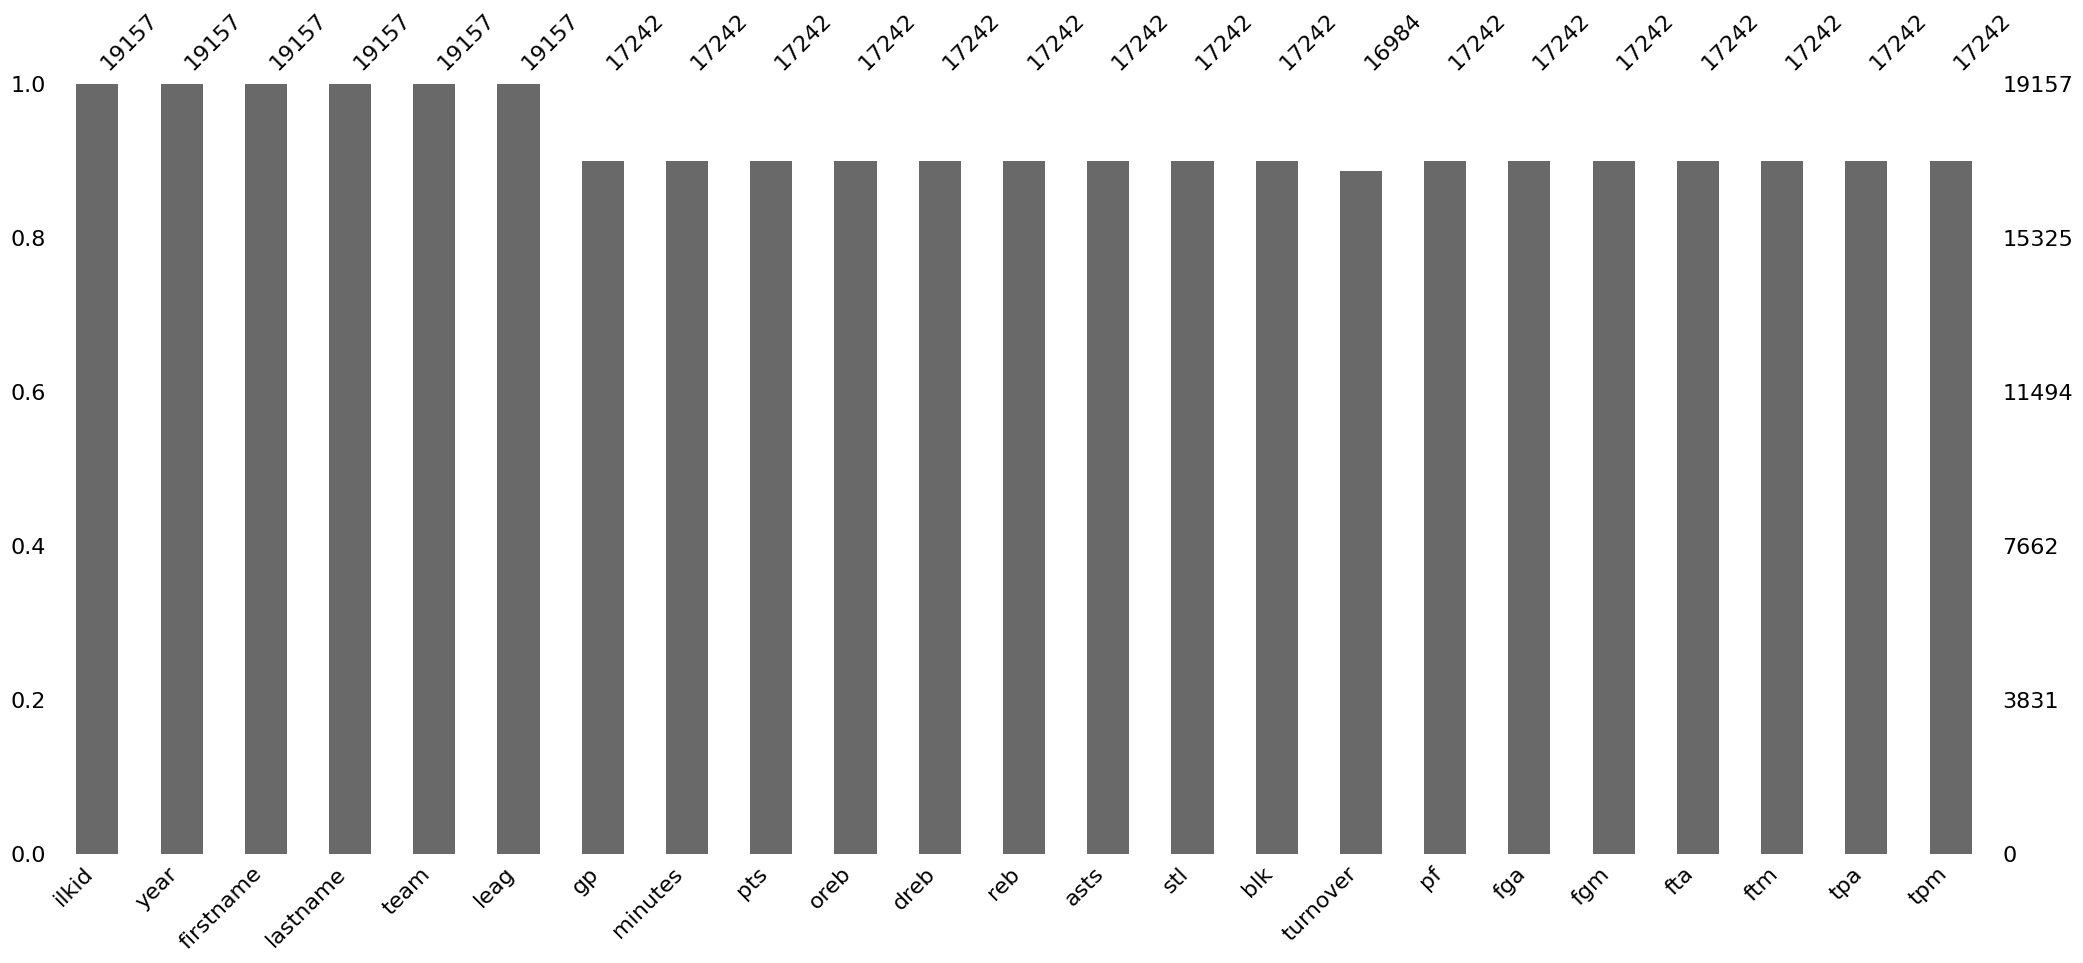

In [ ]:
msno.bar(players)

to assess data quality and guide the cleaning strategy,we visualized the distribution of missing values using a bar plt. This visualization highlights which columns contain missing data and the relatice magnitude of the issue. It supports transparent decision-making regarding imputation, ensures consistency in the cleaning process, and follows standard best practices in EDA (exploratory data analysis);

In [ ]:
number_of_missing_values=players.isna().sum()
print(number_of_missing_values)

ilkid           0
year            0
firstname       0
lastname        0
team            0
leag            0
gp           1915
minutes      1915
pts          1915
oreb         1915
dreb         1915
reb          1915
asts         1915
stl          1915
blk          1915
turnover     2173
pf           1915
fga          1915
fgm          1915
fta          1915
ftm          1915
tpa          1915
tpm          1915
dtype: int64


check how many missing values we have;

In [ ]:
missing=players.isnull().mean()*100
missing=missing.round(2).reset_index()
missing.columns=['Feature','Missing (%)']
print(missing)

      Feature  Missing (%)
0       ilkid         0.00
1        year         0.00
2   firstname         0.00
3    lastname         0.00
4        team         0.00
5        leag         0.00
6          gp        10.00
7     minutes        10.00
8         pts        10.00
9        oreb        10.00
10       dreb        10.00
11        reb        10.00
12       asts        10.00
13        stl        10.00
14        blk        10.00
15   turnover        11.34
16         pf        10.00
17        fga        10.00
18        fgm        10.00
19        fta        10.00
20        ftm        10.00
21        tpa        10.00
22        tpm        10.00


the missing values are not significant in comparison with the overall data;

<Axes: >

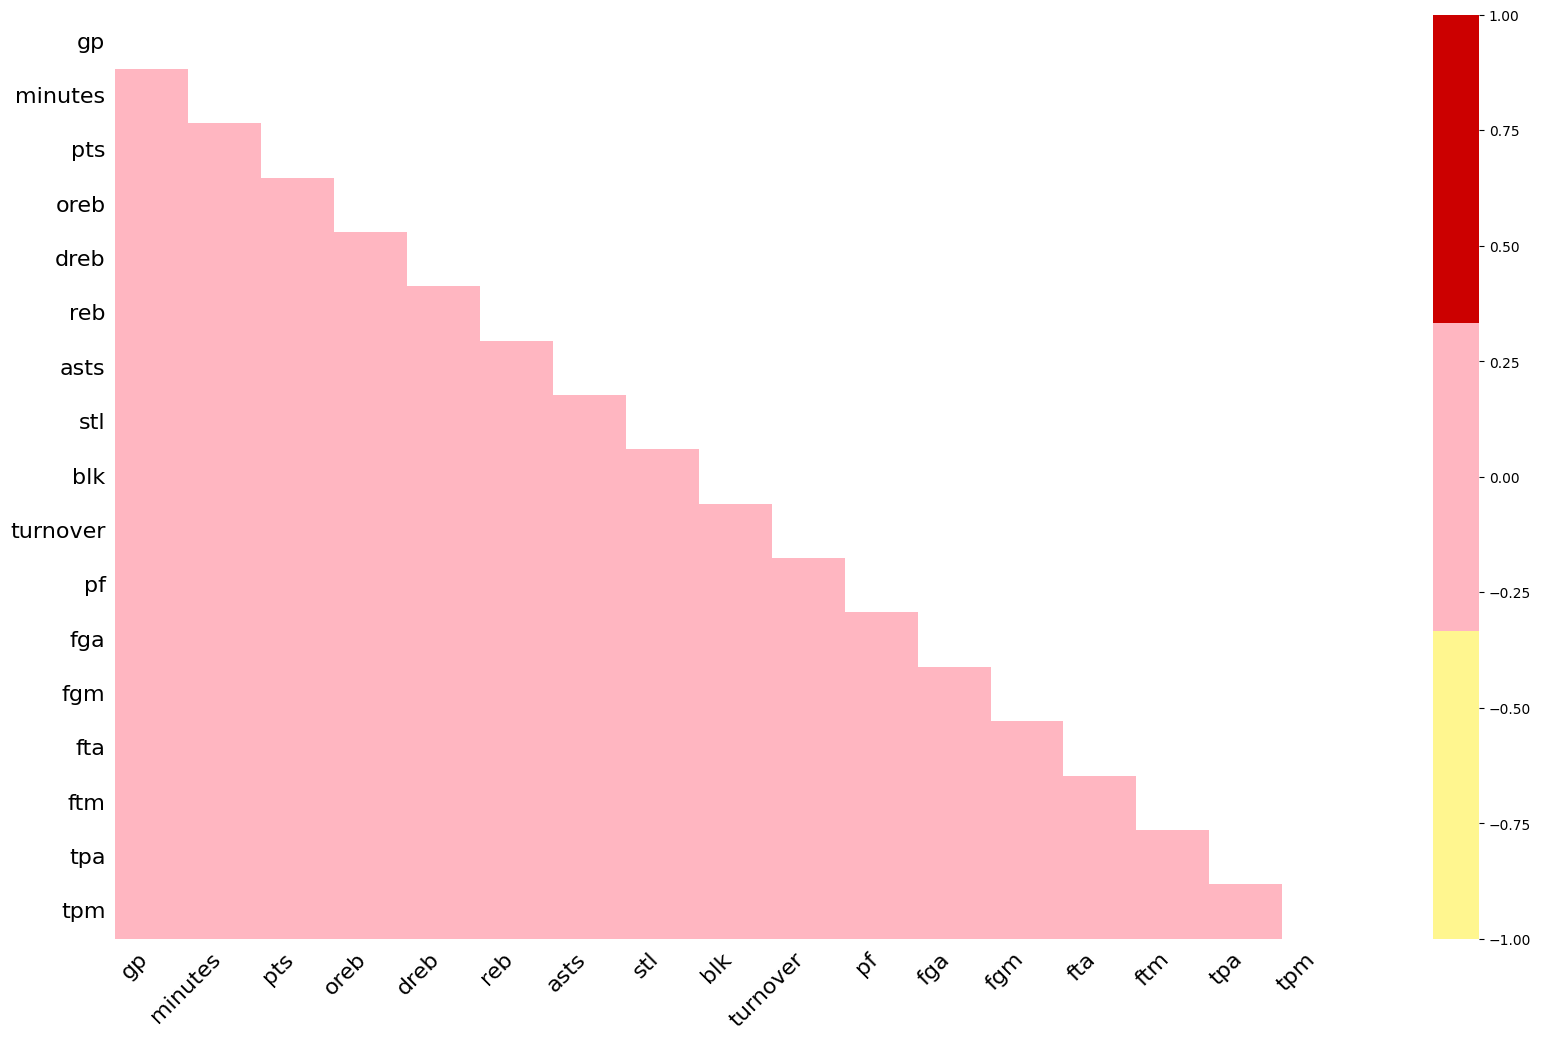

In [ ]:
from matplotlib.colors import ListedColormap
custom_cmap= ListedColormap(["#fff68f","#ffb6c1","#cc0000"])
msno.heatmap(players, cmap=custom_cmap, labels=True)

no strong correlation between the features;

In [ ]:
numeric_cols= players.select_dtypes(include=['float64', 'int64']).columns
players[numeric_cols]= players[numeric_cols].fillna(0)

we complete all the missing values of the numerical features with 0;

In [ ]:
number_of_missing_values=players.isna().sum()
print(number_of_missing_values)

ilkid        0
year         0
firstname    0
lastname     0
team         0
leag         0
gp           0
minutes      0
pts          0
oreb         0
dreb         0
reb          0
asts         0
stl          0
blk          0
turnover     0
pf           0
fga          0
fgm          0
fta          0
ftm          0
tpa          0
tpm          0
dtype: int64


check if all the missing values dissapeared;

**DATA VALIDATION**

In [ ]:
(players[numeric_cols]<0).sum()

,0
year,0
gp,0
minutes,0
pts,0
oreb,0
dreb,0
reb,0
asts,0
stl,0
blk,0


we wanted to make sure there are no negative statistics;

In [ ]:
(players['fgm']> players['fga']).sum()

np.int64(1692)

the field goals made(fgm) cannot be more than the field goals attempted (fga), in this case we need to find a way to deal with them, and as 1692 represent less than 10% of the total data, we decided to eliminate them;

In [ ]:
(players['ftm']> players['fta']).sum()

np.int64(1678)

the free throws made(ftm) cannot be more than the free throws attempted (fta), in this case we need to find a way to deal with them, and as 1678 represent less than 10% of the total data, we decided to eliminate them;

In [ ]:
(players['tpm']> players['tpa']).sum()

np.int64(685)

the three-point made(tpm) cannot be more than the free throws attempts (tpa), in this case we need to find a way to deal with them, and as 685 represent less than 10% of the total data, we decided to eliminate them;

In [ ]:
invalid_rows= (
    (players['fgm'] > players['fga'])|
    (players['ftm'] > players['fta'])|
    (players['tpm'] > players['tpa'])
)
players= players[~invalid_rows]

we eliminate all the rows with impossible values;

In [ ]:
(players['fgm']> players['fga']).sum()

np.int64(0)

In [ ]:
(players['ftm']> players['fta']).sum()

np.int64(0)

In [ ]:
(players['tpm']> players['tpa']).sum()

np.int64(0)

all the impossible values were removed;

In [ ]:
(players['reb'] < players['oreb'] + players['dreb']).sum()

np.int64(1110)

the total rebounds cannot be less than the sum of offensive and defensive rebounds, and as 1110 represent less than 10% of the total data, we eliminate them;

In [ ]:
players= players[~(players['reb'] < players['oreb'] + players['dreb'])]

eliminates all the invalid values;

In [ ]:
(players['reb'] < players['oreb'] + players['dreb']).sum()

np.int64(0)

all the impossible values were removed;

---



In [ ]:
(players['year']< 1946).sum()


np.int64(0)

In [ ]:
(players['year']> 2025).sum()

np.int64(0)

all the players played for a realistic interval;

In [ ]:
players.duplicated().sum()

np.int64(0)

no duplicated rows;

**EXPLORATORY DATA ANALYSIS**

Text(0.5, 0, 'PPG')

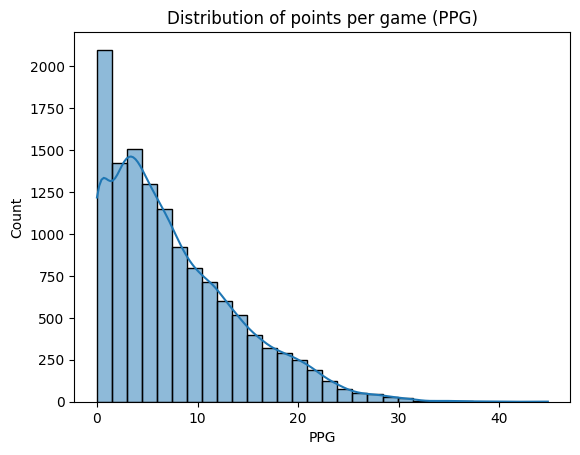

In [ ]:
sns.histplot(players['pts']/ players['gp'], bins=30, kde=True)
plt.title('Distribution of points per game (PPG)')
plt.xlabel('PPG')

this visualization shows the distribution of points per game across all players in the dataset; by dividing total points (pts) by the number of games played (gp), we obtain a normalized measure of scoring performance that allows fair comparison between players with different playing times;
the histogram displays how frequently different PPG values occur, while the KDE curve provides a smooth estimate of the underlying distribution; this helps identify common scoring ranges, detect skewness, and highlight the presence of unusually high-scoring players;

**LOOKING FOR OUTLIERS**

Text(0.5, 1.0, 'Boxplot for points and minutes')

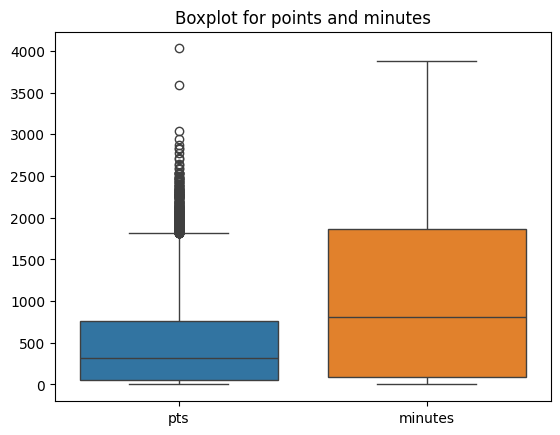

In [ ]:
sns.boxplot(data=players[['pts','minutes']])
plt.title('Boxplot for points and minutes')

this boxplot compares the distribution of total points scored (pts) and total minutes played (minutes) across all players;
 we observe that the pts variable is highly skewed, with a large number of outliers above the upper whisker- indicating that a few players scored significantly more than the average;
 in contrast, the minutes distribution appears more balanced, with fewer extreme values, suggesting more consistent playing time across the dataset;
 this visualization helps identify variability and outliers behaviour in key performance metrics before modeling;

Text(0.5, 1.0, 'Correlation between numerical features')

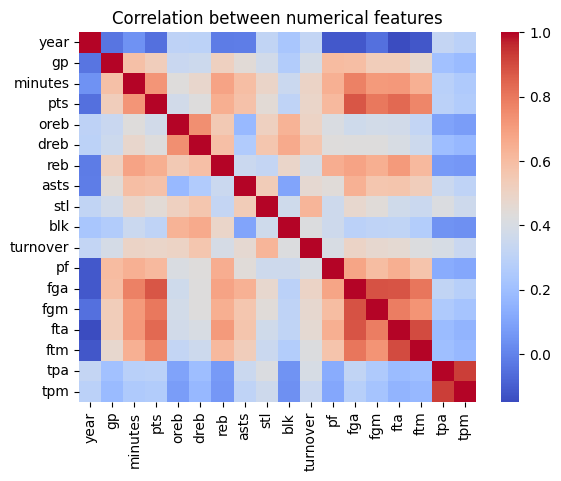

In [ ]:
sns.heatmap(players.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation between numerical features')

This heatmap visualizes the correlation matrix between all numerical features in the dataset. Each cell represents the Pearson correlation coefficient between 2 variables, ranging from -1( strong negative correlation) to +1 (strong positive correlation).
The coolwarm colormap highlightd these relationships: red tones indicate strong positive correlations, while blue tones indicate strong negative ones;
Although annot=False hides the exact numeric values (were impossible to read), the color intensity still reveals key patterns.
For example, we observe:


*   strong positive correlations between fgm and pts, as expected- more field goals made lead to more points;
*   high correlation between minutes and pts, suggesting that players who play more tend to score more;

This visualization helps identify redundant features, potential multicollinearity and meaningful relationships that can inform feature selection of model interpretation.





Text(0, 0.5, 'Points per game')

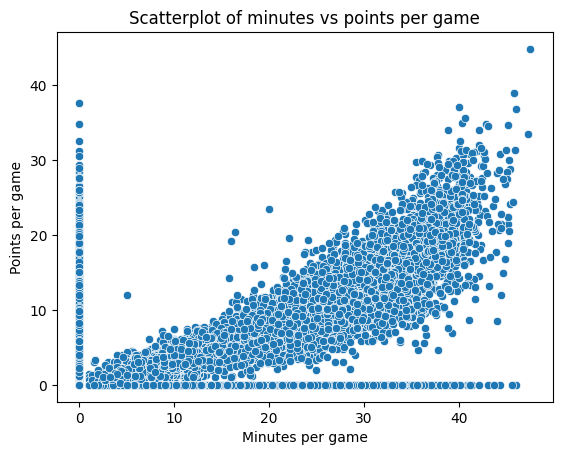

In [ ]:
sns.scatterplot(x=players['minutes']/ players['gp'], y=players['pts']/ players['gp'])
plt.title('Scatterplot of minutes vs points per game')
plt.xlabel('Minutes per game')
plt.ylabel('Points per game')

This scatterplot illustrates the relationship between minutes per game and points per game across all players. each dot represents an individual player, positioned according to how many minutes they played on average (minutes/gp) and how many points they scored per game (pts/gp);
The plot reveals a positive correlation: players who spend more time on the court tend to score more points. This is expected, as increased playing time usually provides more scoring opportunities.
The dense cluster of pointd in the lower-left area suggests that most players have moderate minutes and scoring rates, while a few outliers in the uppr-right corner represent high-usage, high-scoring players.
This visualization helps confirm that playing time is a strong driver of scoring performance, which is valuable context before modeling or interpreting efficiency metrics.

Text(0.5, 1.0, 'Evolution of total points scored over time')

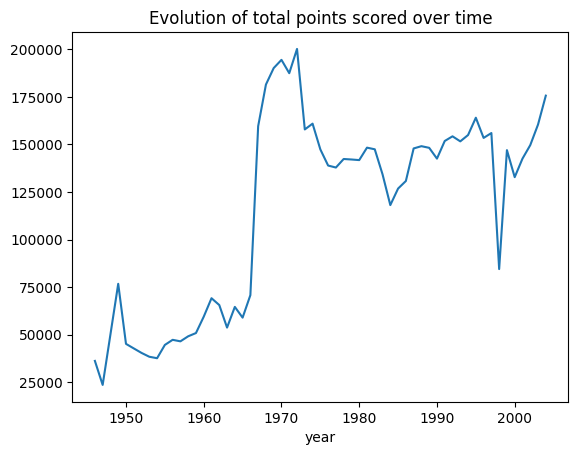

In [ ]:
players.groupby('year')['pts'].sum().plot()
plt.title('Evolution of total points scored over time')

This line plot shows the evolution of total points scored per year across all players in the dataset. By grouping the data by year and summing the pts column, we obtain a historical view of scoring trends in professional basketball.

The graph reveals noticeable fluctuations over time, with certain periods showing sharp increases or declines. These variations may reflect changes in game pace, league rules, player roles, or season length.

For example, scoring peaks might correspond to eras with faster offensive strategies or rule changes that favor scoring, while dips could indicate more defensive styles or shortened seasons.

This visualization provides valuable historical context and helps intrepret how player performance metrics evolved over decades.

MODEL TRAINING(Random Forest, Linear regression)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


DATA PREPARATION

In [ ]:
numeric_columns = ['gp','minutes','pts','oreb','dreb','reb',
                   'asts','stl','blk','turnover','pf','fga',
                   'fgm','fta', 'ftm', 'tpa', 'tpm']
for col in numeric_columns:
  players[col] = pd.to_numeric(players[col], errors='coerce').fillna(0)
agg_dict = { col:'sum' for col in numeric_columns}
agg_dict['firstname'] = 'first'
agg_dict['lastname'] = 'first'
year_stats = players.groupby(['ilkid','year']).agg(agg_dict).reset_index()

# EFF = (PTS + REB + AST + STL + BLK) - (Missed FG + Missed FT + TO)
year_stats['EFF'] = (year_stats['pts'] + year_stats['reb'] + year_stats['asts'] + year_stats['stl'] + year_stats['blk'] -
 (year_stats['fga'] - year_stats['fgm']) - (year_stats['fta'] - year_stats['ftm']) + year_stats['turnover']) # correct!!!
year_stats = year_stats.sort_values(by = ['ilkid', 'year'])
year_stats['Next_Year_EFF'] = year_stats.groupby('ilkid')['EFF'].shift(-1)

df_clean = year_stats.dropna(subset = ['Next_Year_EFF'])

train_mask = df_clean['year'] < 1995
val_mask = (df_clean['year'] >= 1995) & (df_clean['year'] < 1999)
test_mask = (df_clean['year'] >= 2000) & (df_clean['year'] < 2005)

features = ['gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 'stl',
            'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta','ftm', 'tpa', 'tpm', 'EFF']

target = 'Next_Year_EFF'

X_search = pd.concat([df_clean.loc[train_mask, features], df_clean.loc[val_mask, features]])
y_search = pd.concat([df_clean.loc[train_mask, target], df_clean.loc[val_mask, target]])

split_index = [-1] * train_mask.sum() + [0] * val_mask.sum()
pds = PredefinedSplit(test_fold = split_index)



During the step of data preparation, first of all, we addressed data quality by converting all performance statistics to numeric types and filling missing values with 0 (reflecting historical non-recording of certain stats). To handle players traded mid-season, we aggregated records by player ID and year, summing their statistics to create a single consolidated performance profile per season. We then engineered a holistic Efficiency (EFF) metric and generated the target variable, Next_Year_EFF, by shifting future efficiency values backward by one year. Finally, to prevent data leakage, we implemented a strict Temporal Split, dividing the data into Training (Pre-1995), Validation (1995 - 1999), and Testing (2000 - 2005) sets, and used a PredefinedSplit to enforce these time boundaries during model tuning.

RANDOM FOREST MODEL

Starting Grid Search...
Fitting 1 folds for each of 9 candidates, totalling 9 fits

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100}
Best Validation MAE: 397.50
Final Validation dataset MAE: 381.20
X_train shape: (6912, 18)


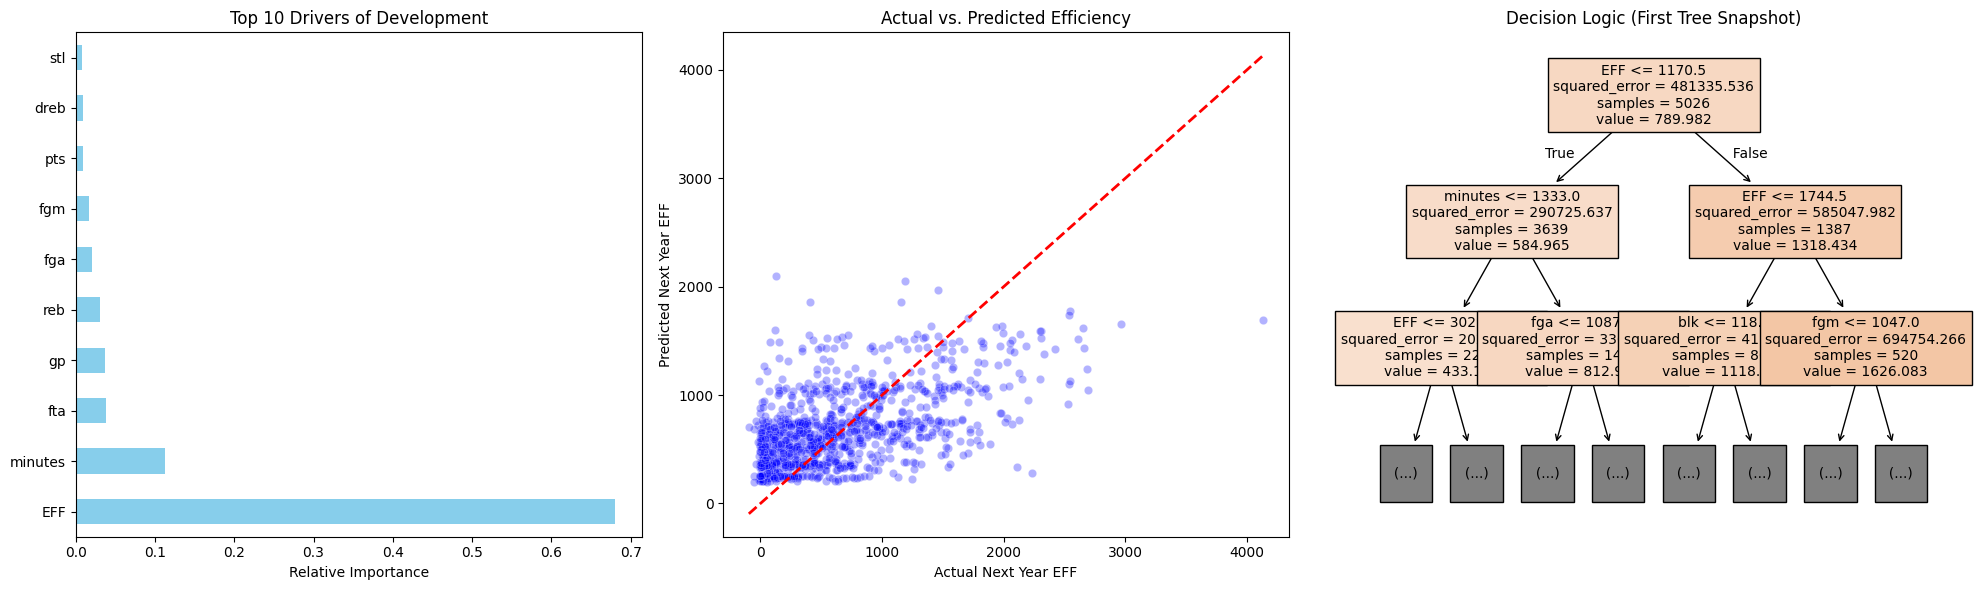

In [ ]:

random_forest = RandomForestRegressor(random_state = 42)
param_grid = {
    'n_estimators': [30, 60, 100],
    'max_depth': [5, 10, 15]
}
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator = random_forest,
    param_grid = param_grid,
    cv = pds,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
    verbose = 1
)

grid_search.fit(X_search, y_search)

print("\nBest Hyperparameters:", grid_search.best_params_)
print(f"Best Validation MAE: {-grid_search.best_score_:.2f}")

best_model = grid_search.best_estimator_
X_train = df_clean.loc[train_mask, features]
y_train = df_clean.loc[train_mask, target]
X_val = df_clean.loc[val_mask, features]
y_val = df_clean.loc[val_mask, target]

print(f"Final Validation dataset MAE: {mean_absolute_error(y_val, best_model.predict(X_val)):.2f}")
print(f"X_train shape: {X_train.shape}")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))


importances = best_model.feature_importances_
feat_importances = pd.Series(importances, index=features)


feat_importances.nlargest(10).plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Drivers of Development')
axes[0].set_xlabel('Relative Importance')


val_preds = best_model.predict(X_val)

sns.scatterplot(x=y_val, y=val_preds, alpha=0.3, ax=axes[1], color='blue')

val_min, val_max = y_val.min(), y_val.max()
axes[1].plot([val_min, val_max], [val_min, val_max], 'r--', lw=2)

axes[1].set_title('Actual vs. Predicted Efficiency')
axes[1].set_xlabel('Actual Next Year EFF')
axes[1].set_ylabel('Predicted Next Year EFF')


from sklearn.tree import plot_tree
plot_tree(best_model.estimators_[0],
          feature_names=features,
          filled=True,
          max_depth=2,
          ax=axes[2],
          fontsize=10)
axes[2].set_title('Decision Logic (First Tree Snapshot)')

plt.tight_layout()
plt.show()

We tested multiple configurations, varying the number of trees (n_estimators = 30, 60, 100) and the complexity of each tree (max_depth = 5, 10, 15). This created 9 different "candidate" models. It graded each model based on MAE (Mean Absolute Error). The model with the lowest validation error wins. We tuned these hyperparameters using a Grid Search strategy, we try to find the perfect balance between learning complex patterns and avoiding overfitting. The most optimal candidate was 100 trees with a depth of 10. Each tree analyzes a random subset of the data to make its own prediction. During the prediction phase, the model aggregates the output of all 100 trees and calculates the average to produce the final Efficiency score. For comprehensible visualization we decided to choose only one tree as our representative to avoid of visual overwhelming.

MULTIPLE REGRESSION MODEL

Linear Regression Validation dataset MAE: 400.43


Text(0, 0.5, 'Residuals')

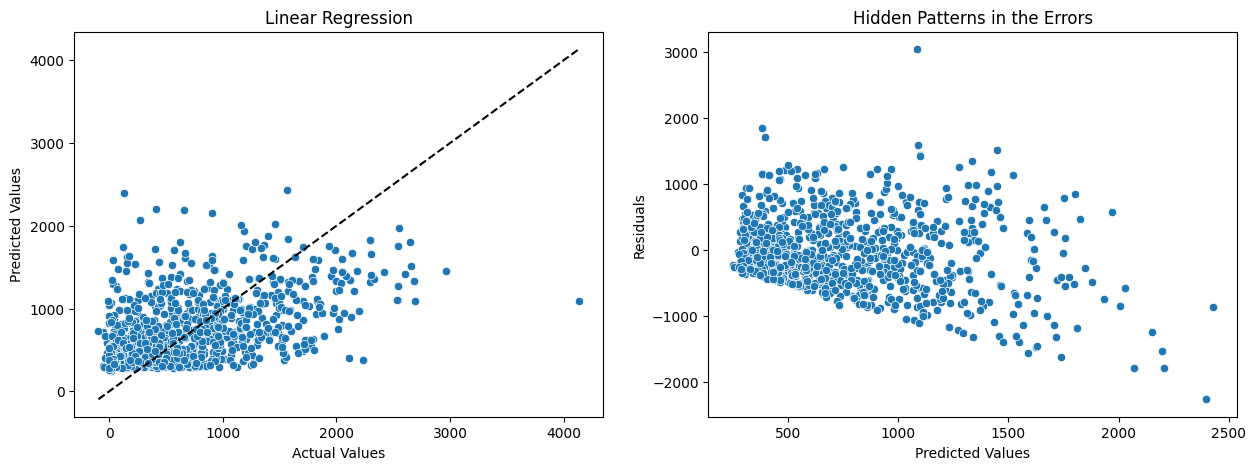

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

linear_regr = LinearRegression()
linear_regr = Ridge(alpha=10)
linear_regr = linear_regr.fit(X_train_scaled, y_train)

linear_regr_val_preds = linear_regr.predict(X_val_scaled)
linear_regr_val_mae = mean_absolute_error(y_val, linear_regr_val_preds)
print(f"Linear Regression Validation dataset MAE: {linear_regr_val_mae:.2f}")


fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.scatterplot(x = y_val, y = linear_regr_val_preds, ax = axes[0])
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
val_min = y_val.min()
val_max = y_val.max()
axes[0].plot([val_min,val_max], [val_min,val_max], 'k--')

residuals = y_val - linear_regr_val_preds
sns.scatterplot(x = linear_regr_val_preds, y = residuals, ax = axes[1])
axes[1].set_title('Hidden Patterns in the Errors')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')


We established a performance baseline using Multiple Linear Regression(standard, simple math equation) with Ridge Regularization. We specifically chose Ridge (L2 Regularization) over standard Ordinary Least Squares because our EDA revealed high multicollinearity among the input features—for example, Points and Minutes are strongly correlated. Standard regression models often become unstable with such data, assigning erratic weights to competing variables. By applying a regularization strength of (alpha=10) and normalizing the features with a StandardScaler, we penalized large weights in the model, which prevents the algorithm from assigning a massive coefficient to just one feature (like Points) while ignoring a highly correlated one (like Minutes), instead compelling the model to share the weight between them. This produced a stable linear benchmark, allowing us to scientifically prove that the superior performance of our Random Forest was due to its ability to capture non-linear development patterns, rather than just overfitting the data.

MODEL TRAINING(KNN)


Starting KNN Grid Search (Scaled Data, KFold on Train)...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Hyperparameters (KNN): {'n_neighbors': 20, 'weights': 'distance'}
Internal Cross-Val MAE (KNN): 421.65
KNN Validation MAE (Corrected): 399.88


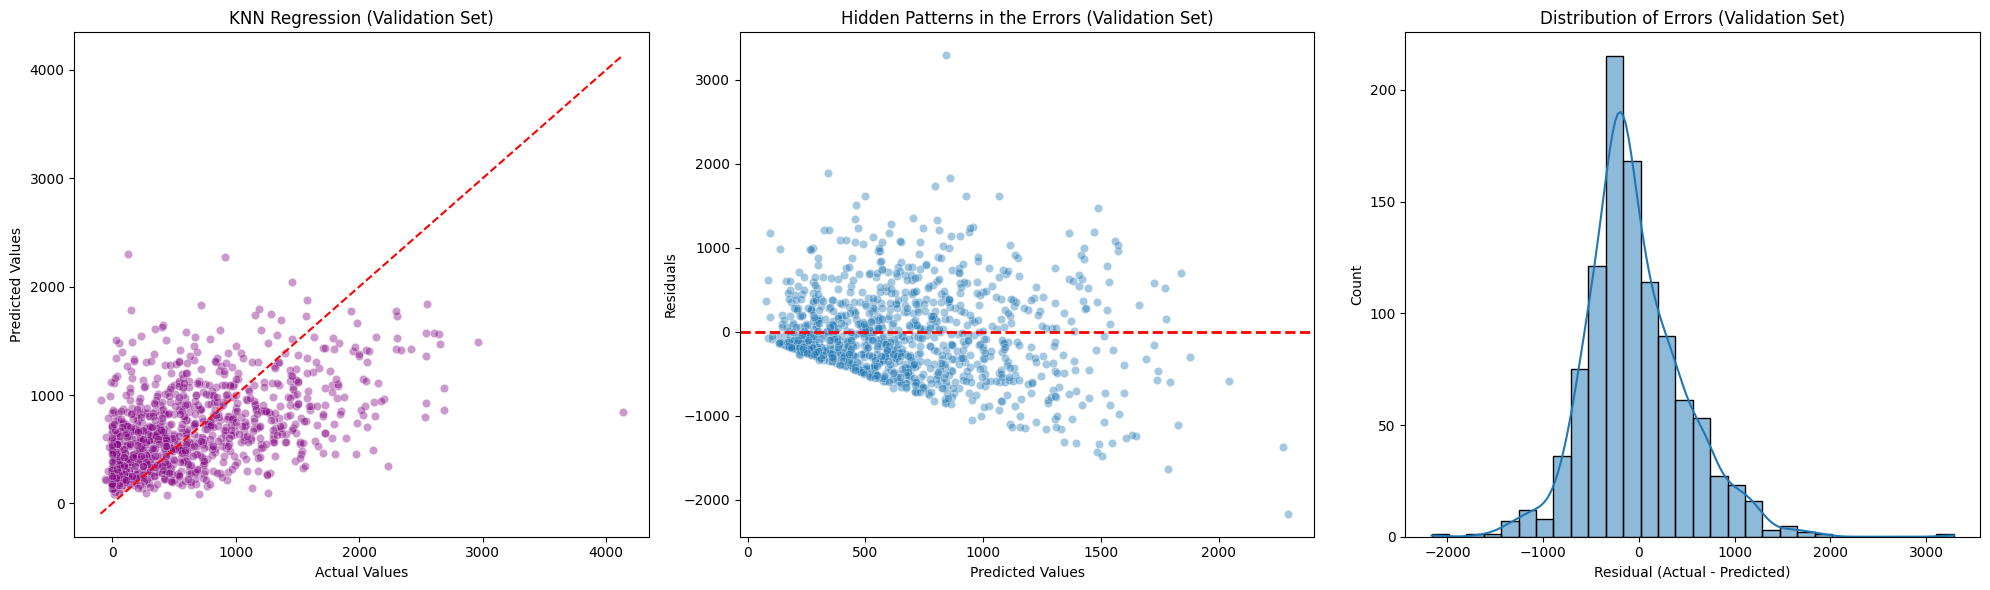

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


features = ['gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 'stl','blk', 'turnover', 'pf', 'fga', 'fgm', 'fta','ftm', 'tpa', 'tpm', 'EFF']
target = 'Next_Year_EFF'

X_train = df_clean.loc[train_mask, features]
y_train = df_clean.loc[train_mask, target]
X_val = df_clean.loc[val_mask, features]
y_val = df_clean.loc[val_mask, target]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)


print("\nStarting KNN Grid Search (Scaled Data, KFold on Train)...")

knn = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = param_grid_knn,
    cv = kf,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
    verbose = 1
)

grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_

print("\nBest Hyperparameters (KNN):", grid_search_knn.best_params_)
print(f"Internal Cross-Val MAE (KNN): {-grid_search_knn.best_score_:.2f}")



knn_val_preds = best_knn.predict(X_val_scaled)
knn_val_mae = mean_absolute_error(y_val, knn_val_preds)

print(f"KNN Validation MAE (Corrected): {knn_val_mae:.2f}") # <-- Здесь будет не-нулевое значение

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x=y_val, y=knn_val_preds, ax=axes[0], alpha=0.4, color='purple')
val_min, val_max = y_val.min(), y_val.max()
axes[0].plot([val_min, val_max], [val_min, val_max], 'r--')
axes[0].set_title("KNN Regression (Validation Set)")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

residuals_knn = y_val - knn_val_preds
sns.scatterplot(x=knn_val_preds, y=residuals_knn, ax=axes[1], alpha=0.4)
axes[1].axhline(0, color='r', linestyle='--', lw=2)
axes[1].set_title("Hidden Patterns in the Errors (Validation Set)")
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals")

sns.histplot(residuals_knn, bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Errors (Validation Set)")
axes[2].set_xlabel("Residual (Actual - Predicted)")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

For the KNN part, we first scaled all numerical features so that every variable is on the same level (KNN relies heavily on distances, so this step is essential).

After that, we ran a Grid Search with 5-fold cross - validation on the training data, trying different numbers of neighbors and weighting strategies to find the most stable setup.

Once the best KNN version was selected, we tested it on the validation set and measured its MAE. To better understand how the model behaves, we visualized the predictions with three simple plots: actual vs. predicted values, the pattern of residual errors, and the distribution of those errors.

COMPARISON ON THE VALIDATION TEST




--- Validation MAE for all models (1995-1999) ---
Random Forest MAE:   381.20
Linear Regression MAE: 400.43
K-Nearest Neighbors MAE: 399.88

SUMMARY: COMPARISON ON THE VALIDATION SET:
| Model               |   Validation MAE |
|:--------------------|-----------------:|
| Random Forest       |          381.2   |
| K-Nearest Neighbors |          399.876 |
| Linear Regression   |          400.429 |
The Winner on Validation Set is: Random Forest


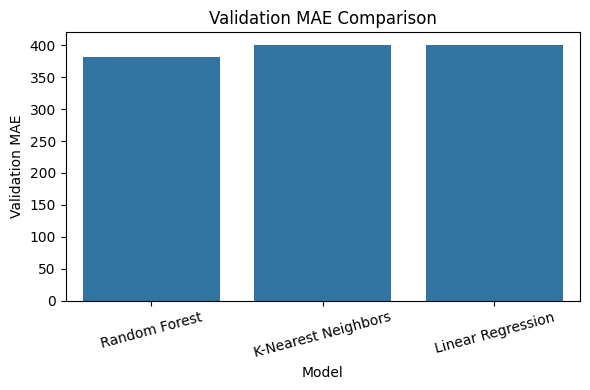

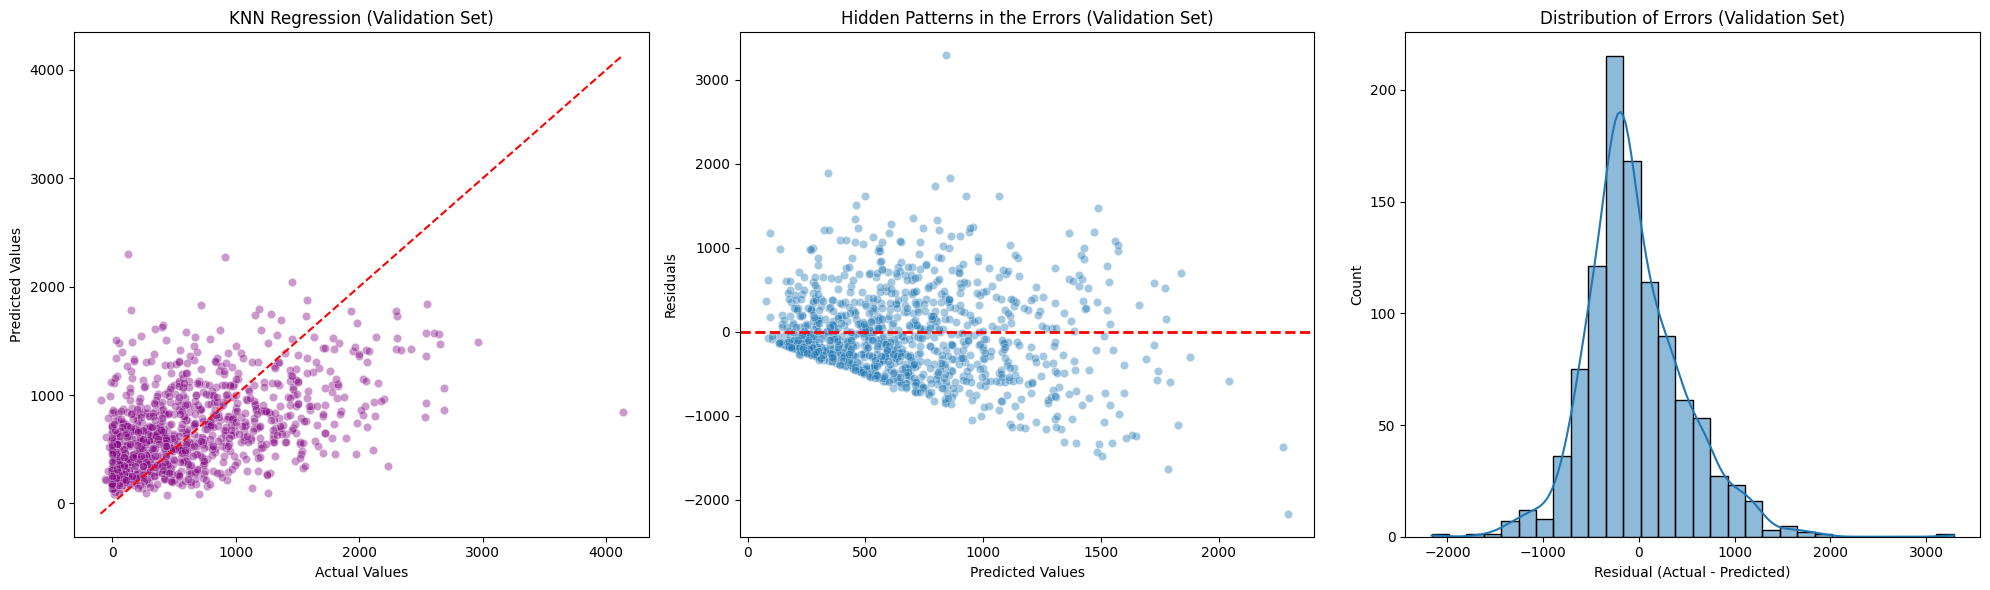

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


knn_val_preds = best_knn.predict(X_val_scaled)
knn_val_mae = mean_absolute_error(y_val, knn_val_preds)

rf_val_preds = best_model.predict(X_val)
rf_val_mae = mean_absolute_error(y_val, rf_val_preds)

lr_val_preds = linear_regr.predict(X_val_scaled)
lr_val_mae = mean_absolute_error(y_val, lr_val_preds)

print("\n--- Validation MAE for all models (1995-1999) ---")
print(f"Random Forest MAE:   {rf_val_mae:.2f}")
print(f"Linear Regression MAE: {lr_val_mae:.2f}")
print(f"K-Nearest Neighbors MAE: {knn_val_mae:.2f}")


results_df_val = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'K-Nearest Neighbors'],
    'Validation MAE': [rf_val_mae, lr_val_mae, knn_val_mae]
}).sort_values(by="Validation MAE")

print("\nSUMMARY: COMPARISON ON THE VALIDATION SET:")
print(results_df_val.to_markdown(index=False))

winner_val = results_df_val.iloc[0]['Model']
print(f"The Winner on Validation Set is: {winner_val}")

plt.figure(figsize=(6, 4))
sns.barplot(data=results_df_val, x='Model', y='Validation MAE')
plt.title('Validation MAE Comparison')
plt.ylabel('Validation MAE')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x=y_val, y=knn_val_preds, ax=axes[0], alpha=0.4, color='purple')
val_min = y_val.min()
val_max = y_val.max()
axes[0].plot([val_min, val_max], [val_min, val_max], 'r--')
axes[0].set_title('KNN Regression (Validation Set)')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

residuals_knn = y_val - knn_val_preds
sns.scatterplot(x=knn_val_preds, y=residuals_knn, ax=axes[1], alpha=0.4)
axes[1].axhline(0, color='r', linestyle='--', lw=2)
axes[1].set_title('Hidden Patterns in the Errors (Validation Set)')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

sns.histplot(residuals_knn, bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Errors (Validation Set)')
axes[2].set_xlabel('Residual (Actual - Predicted)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In this section, we evaluate and compare the performance of all three models: Random Forest, Linear Regression, and KNN.

For each model, we generate predictions and calculate the Mean Absolute Error (MAE), which tells us how far the predicted next-season efficiency is from the actual one on average.

We summarize the results in a small table and a bar chart to clearly see which model performs better, and we identify the model with the lowest validation MAE as the winner.

After the overall comparison, we zoom in on the KNN model to better understand how it behaves. We visualize its accuracy by plotting actual vs. predicted values, check residual patterns to see whether the model systematically over or under predicts certain players, and examine the distribution of errors to understand how consistent the predictions are

FINAL TEST

In [ ]:

X_test = df_clean.loc[test_mask, features]
y_test = df_clean.loc[test_mask, target]

X_test_scaled = scaler.transform(X_test)

rf_test_mae = mean_absolute_error(y_test, best_model.predict(X_test))
lr_test_mae = mean_absolute_error(y_test, linear_regr.predict(X_test_scaled))
knn_test_mae = mean_absolute_error(y_test, best_knn.predict(X_test_scaled))

print("\n--- Test MAE for all models (2000–2005) ---")
print(f"Random Forest MAE:        {rf_test_mae:.2f}")
print(f"Linear Regression MAE:    {lr_test_mae:.2f}")
print(f"K-Nearest Neighbors MAE:  {knn_test_mae:.2f}")

winner_val = results_df_val.iloc[0]['Model']
print(f"\nWinner based on Validation Set: {winner_val}")

if winner_val == 'Random Forest':
    final_model = best_model
    X_final = X_test

elif winner_val == 'Linear Regression':
    final_model = linear_regr
    X_final = X_test_scaled

elif winner_val == 'K-Nearest Neighbors':
    final_model = best_knn
    X_final = X_test_scaled
final_test_mae = mean_absolute_error(y_test, final_model.predict(X_final))

print(f"\nThe Overall Winner is: {winner_val}")
print(f"FINAL TEST MAE ({winner_val}): {final_test_mae:.2f}")


--- Test MAE for all models (2000–2005) ---
Random Forest MAE:        388.24
Linear Regression MAE:    386.30
K-Nearest Neighbors MAE:  392.06

Winner based on Validation Set: Random Forest

The Overall Winner is: Random Forest
FINAL TEST MAE (Random Forest): 388.24


After choosing the best model on the validation set, we test it on completely unseen data from 2000–2005.
Here we check how well each model (Random Forest, Linear Regression, and KNN) predicts next-season efficiency by calculating their MAE on the test set.

Since different models require different inputs, we pass scaled data to LR and KNN, and raw data to Random Forest.
Then we select the model that previously won on the validation period and evaluate it again on the test set to confirm whether it generalizes well.

The final Test MAE shows how accurately our chosen model can predict future performance for players it has never seen, giving us the true measure of its real-world reliability.